# Project 3: Collaboration and competition

The code is structured in the next way:
- Tennis_solution.ipynb: Main function. Just need to run one cell for training or another one for testing with the train model.
- DDPGAgent.py: Contains a generic DDPG agent and the specific implementations of the randomic buffer replay and the noise source.
- maddpg.py: Encompasses the listing of several agents to work in the multi agent sense. For this interfacing functions are created to work with stacked observations, actions, rewards and replay members. In the same manner the MADDPG algorithm for training and inference is programmed by storing the deep neural networks in a convenient manner.
- models.py: Contains the proposed models for the actor and the critic, characteristic of a DDPG agent.
- utils.py: Contains some helper functions for encoding and decoding the replay members to allow for stacked data structures to be used as entities.

Run the next cell to perform the training. Go to the next cell if model import and testing is desired.

In [1]:
#!pip -q install ./python #Not needed, this was just useful for my virtual environment on the cloud.

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
Episode 100	Average Score: 0.00	last score: 0.00
Episode 200	Average Score: 0.01	last score: 0.00
Episode 300	Average Score: 0.01	last score: 0.09
Episode 400	Average Score: 0.05	last score: 0.10
Episode 500	Average Score: 0.04	last score: 0.00
Episode 600	Average Score: 0.05	last score: 0.10
Episode 700	Average Score: 0.04	last score: 0.10
Episode 800	Average Score: 0.04	last score: 0.10
Episode 900	Average Score: 0.04	last score: 0.00
Episode 1000	Average Score: 0.05	last score: 0.10
Episode 1100	Average Score: 0.05	last score: 0.09
Episode 1200	Average Score: 0.09	last score: 0.

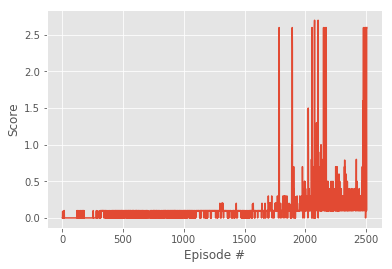

'\nagent = MADDPG(state_size, action_size, seed=10, a_check=None, c_check=None, gamma=0.995, tau=1e-3, add_noise=False, mu=0.,\n                 theta=0.15, sigma=0.2, lr_actor=1e-4, lr_critic=4e-3,buffer_size=1e5, batch_size=200, update_every = 4,\n                 low_action=-1, high_action=1, num_agents=2, warm_up=0, consecutive_learns=3, clip_critic_grad=0)\n                 \nEpisode 100\tAverage Score: 0.03\tlast score: 0.00\nEpisode 200\tAverage Score: 0.00\tlast score: 0.00\nEpisode 300\tAverage Score: 0.02\tlast score: 0.00\nEpisode 400\tAverage Score: 0.01\tlast score: 0.00\nEpisode 500\tAverage Score: 0.01\tlast score: 0.00\nEpisode 600\tAverage Score: 0.00\tlast score: 0.00\nEpisode 700\tAverage Score: 0.01\tlast score: 0.00\nEpisode 800\tAverage Score: 0.04\tlast score: 0.00\nEpisode 900\tAverage Score: 0.01\tlast score: 0.00\nEpisode 1000\tAverage Score: 0.07\tlast score: 0.10\nEpisode 1100\tAverage Score: 0.09\tlast score: 0.09\nEpisode 1200\tAverage Score: 0.08\tlast sc

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import torch
from collections import deque
from maddpg import MADDPG

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
'''
count = 0
import time
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        count += 1
        #time.sleep(3)
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        #print("Agent 1:")
        #print(str(next_states[0]))
        #print("Agent 2:")
        #print(str(next_states[1]))
        #print()
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones) or count==10:                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

env.close()
'''

# Create an agent, pass a desired size for the hiden layers.
agent = MADDPG(state_size, action_size, seed=10, a_check=(None,None), c_check=(None,None), gamma=0.995, tau=1e-3, add_noise=False, mu=0.,
                 theta=0.15, sigma=0.2, lr_actor=1e-4, lr_critic=3.5e-3,buffer_size=1e5, batch_size=200, update_every = 4,
                 low_action=-1, high_action=1, num_agents=2, warm_up=0, consecutive_learns=3, clip_critic_grad=0)


# Define dqn algorithm
def maddpg(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(2)
        while True:
            actions = agent.act(states, random=False)
            env_info = env.step(actions)[brain_name]
            next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done

            #next_state = agent.state_normalizer(next_state)
            #reward = agent.reward_normalizer(reward)
    
            agent.step(states, actions, rewards, next_states, dones, i_episode)
            states = next_states
            score += rewards
            if np.any(dones):
                break
        episode_score = np.max(score)
        scores_window.append(episode_score)  # save most recent score
        scores.append(episode_score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\tlast score: {:.2f}'.format(i_episode, np.mean(scores_window), episode_score), end="")
        if i_episode % 100 == 0:
            print('\nEpisode {}\tAverage Score: {:.2f}\tlast score: {:.2f}'.format(i_episode, np.mean(scores_window), episode_score), end="")
        if np.mean(scores_window) >= 0.5 and i_episode > 50:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            for i in range(0, num_agents):
                torch.save(agent.agents[i].critic.state_dict(), 'my_critic_{}.pth'.format(i))
                torch.save(agent.agents[i].actor.state_dict(), 'my_actor_{}.pth'.format(i))
            break
        # A small step in learning rate to allow for quicker convergence with above set parameters
        #if i_episode == 1200:
        #    agent.adjust_learning_rate(1200, 2E-5)
    return scores


scores = maddpg()

env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Save scores
with open('scores.txt', 'w') as f:
    for item in scores:
        f.write("%f\n" % item)


'''
A second run with the headed environment needed of retuning lr_actor parameter:
agent = MADDPG(state_size, action_size, seed=10, a_check=None, c_check=None, gamma=0.995, tau=1e-3, add_noise=False, mu=0.,
                 theta=0.15, sigma=0.2, lr_actor=1e-4, lr_critic=4e-3,buffer_size=1e5, batch_size=200, update_every = 4,
                 low_action=-1, high_action=1, num_agents=2, warm_up=0, consecutive_learns=3, clip_critic_grad=0)
                 
Episode 100	Average Score: 0.03	last score: 0.00
Episode 200	Average Score: 0.00	last score: 0.00
Episode 300	Average Score: 0.02	last score: 0.00
Episode 400	Average Score: 0.01	last score: 0.00
Episode 500	Average Score: 0.01	last score: 0.00
Episode 600	Average Score: 0.00	last score: 0.00
Episode 700	Average Score: 0.01	last score: 0.00
Episode 800	Average Score: 0.04	last score: 0.00
Episode 900	Average Score: 0.01	last score: 0.00
Episode 1000	Average Score: 0.07	last score: 0.10
Episode 1100	Average Score: 0.09	last score: 0.09
Episode 1200	Average Score: 0.08	last score: 0.10
Episode 1300	Average Score: 0.08	last score: 0.10
Episode 1400	Average Score: 0.11	last score: 0.10
Episode 1500	Average Score: 0.10	last score: 0.10
Episode 1600	Average Score: 0.12	last score: 0.10
Episode 1700	Average Score: 0.08	last score: 0.00
Episode 1800	Average Score: 0.08	last score: 0.10
Episode 1900	Average Score: 0.11	last score: 0.20
Episode 2000	Average Score: 0.08	last score: 0.10
Episode 2100	Average Score: 0.23	last score: 0.10
Episode 2200	Average Score: 0.14	last score: 0.10
Episode 2300	Average Score: 0.10	last score: 0.10
Episode 2400	Average Score: 0.24	last score: 0.20
Episode 2500	Average Score: 0.31	last score: 0.10
Episode 2600	Average Score: 0.29	last score: 1.00
Episode 2700	Average Score: 0.54	last score: 0.00
Episode 2703	Average Score: 0.51	last score: 0.00
'''

## Loading score history only

Notice that the scores were saved in scores.txt. They can be imported as seen in the next cell. The algorithm could solve the agent-environment interaction after 2408 episodes, but in reality we observed potential to grow further. See the README section to get to know more.

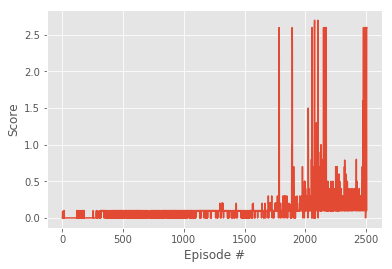

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
# plot the scores
i_scores = []
with open('scores.txt', 'r') as f:  
    for line in f:
        # remove linebreak which is the last character of the string
        val = line[:-1]
        # add item to the list
        i_scores.append(float(val))
       
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(i_scores)), i_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Loading pretrained model and testing only

Run the next cell for testing only. Notice that we are reloading the environment, this time the version with visual interface attached. Also our pretrained model is being loaded into an agent instance and used for the loop.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from maddpg import MADDPG

env = UnityEnvironment(file_name='Tennis_Linux/Tennis.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

a_ch0 = torch.load('my_actor_0.pth', map_location=lambda storage, loc: storage)
c_ch0 = torch.load('my_critic_0.pth', map_location=lambda storage, loc: storage)
a_ch1 = torch.load('my_actor_1.pth', map_location=lambda storage, loc: storage)
c_ch1 = torch.load('my_critic_1.pth', map_location=lambda storage, loc: storage)
agent = MADDPG(state_size, action_size, seed=10, a_check=(a_ch0,a_ch1), c_check=(c_ch0,c_ch1), gamma=0.995, tau=1e-3, add_noise=False, mu=0.,
                 theta=0.15, sigma=0.2, lr_actor=1e-4, lr_critic=3.5e-3,buffer_size=1e5, batch_size=200, update_every = 4,
                 low_action=-1, high_action=1, num_agents=2, warm_up=0, consecutive_learns=3, clip_critic_grad=0)

scores = np.zeros(2)
count = 0
episodes = 0
while True:
    count += 1
    actions = agent.act(states, random=False)
    env_info = env.step(actions)[brain_name]
    next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
    states = next_states
    scores += rewards
    if np.any(dones):                                  # exit loop if episode finished
        episodes += 1
        if episodes == 10:
            break
print('Score (max over agents): {}'.format(np.max(scores)))

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
